<a href="https://colab.research.google.com/github/SahithyaVoleti/Attendance-management/blob/main/idp_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/survey lung cancer.csv')

# Display the first few rows
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.shape

(309, 16)

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/survey lung cancer.csv')

# Print all column names
print(df.columns)

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/survey lung cancer.csv')

# Create a new DataFrame with 0s for nulls and 1s for non-nulls
null_values_df = df.notnull().astype(int)

# Print the new DataFrame
print(null_values_df)

     GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1    1        1               1        1              1   
1         1    1        1               1        1              1   
2         1    1        1               1        1              1   
3         1    1        1               1        1              1   
4         1    1        1               1        1              1   
..      ...  ...      ...             ...      ...            ...   
304       1    1        1               1        1              1   
305       1    1        1               1        1              1   
306       1    1        1               1        1              1   
307       1    1        1               1        1              1   
308       1    1        1               1        1              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         1         1         1                  1   
1                  1     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [ ]:
df["LUNG_CANCER"].describe()

,LUNG_CANCER
count,309
unique,2
top,YES
freq,270


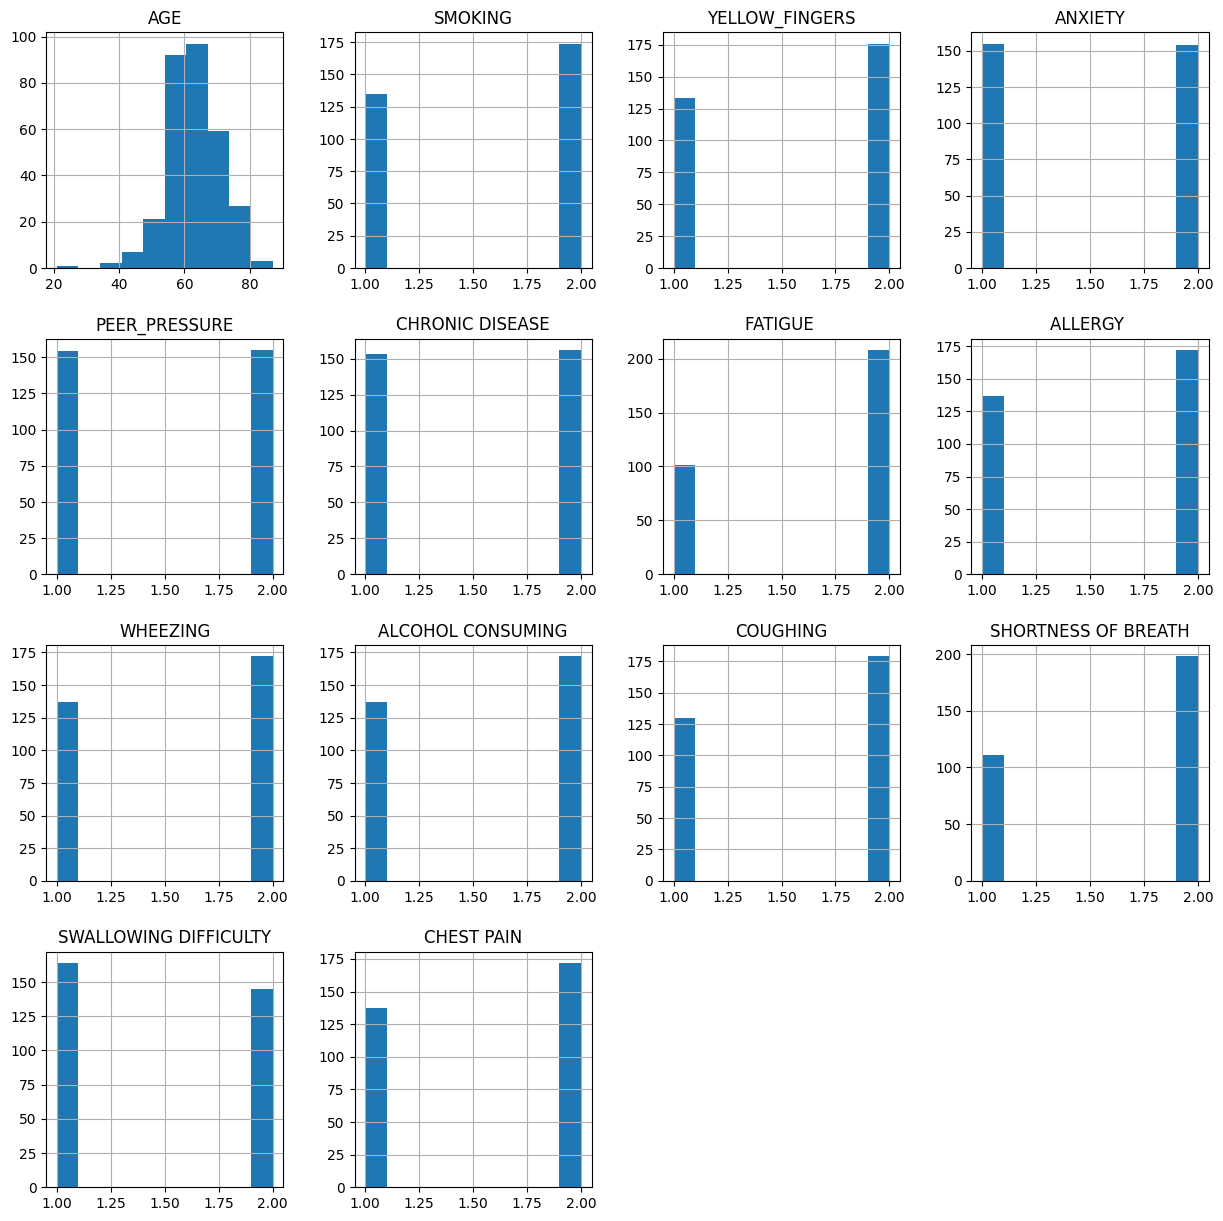

In [ ]:
df.hist(figsize=(15,15))
plt.show()

<ipython-input-10-fe513d954496>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette={"YES": "green", "NO": "red"})


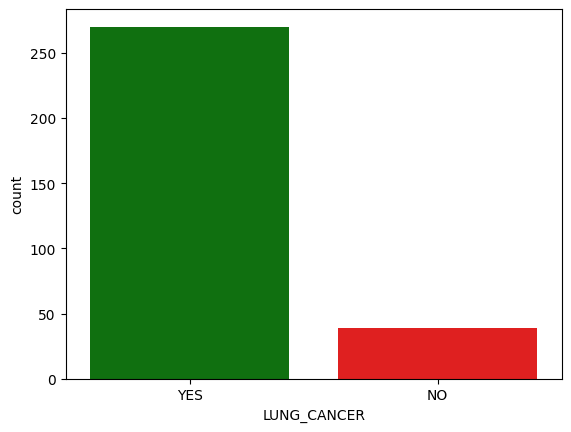

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

y = df["LUNG_CANCER"]

# Create the countplot with custom colors
sns.countplot(x=y, palette={"YES": "green", "NO": "red"})

# Display the plot
plt.show()

<Axes: xlabel='GENDER', ylabel='LUNG_CANCER'>

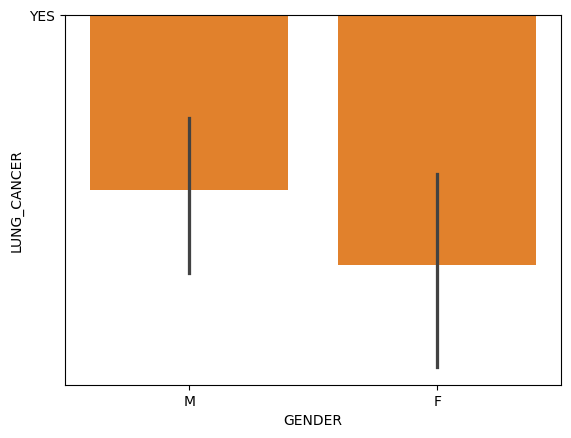

In [ ]:
df["GENDER"].unique()
sns.barplot(x=df["GENDER"], y=y)
sns.barplot(x="GENDER", y="LUNG_CANCER", data=df)

<Axes: xlabel='AGE', ylabel='LUNG_CANCER'>

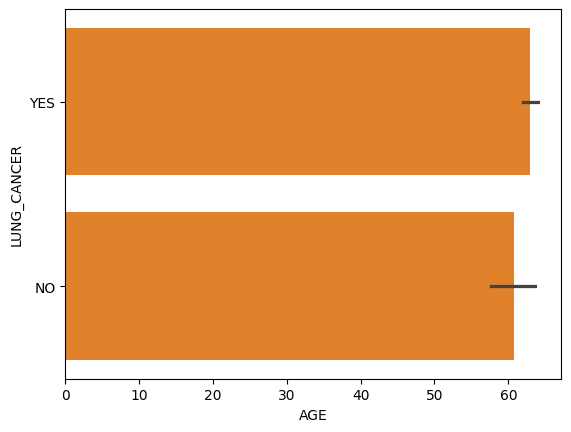

In [ ]:
df["AGE"].unique()
sns.barplot(x=df["AGE"], y=y)
sns.barplot(x="AGE", y="LUNG_CANCER", data=df)

<Axes: xlabel='SMOKING', ylabel='LUNG_CANCER'>

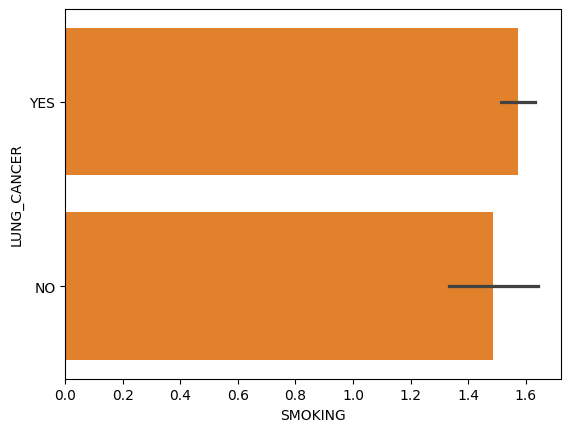

In [ ]:
df["SMOKING"].unique()
sns.barplot(x=df["SMOKING"], y=y)
sns.barplot(x="SMOKING", y="LUNG_CANCER", data=df)

<Axes: xlabel='YELLOW_FINGERS', ylabel='LUNG_CANCER'>

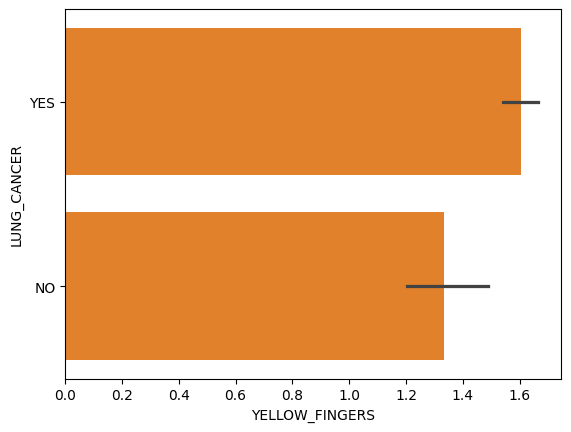

In [ ]:
df["YELLOW_FINGERS"].unique()
sns.barplot(x=df["YELLOW_FINGERS"], y=y)
sns.barplot(x="YELLOW_FINGERS", y="LUNG_CANCER", data=df)

<Axes: xlabel='ANXIETY', ylabel='LUNG_CANCER'>

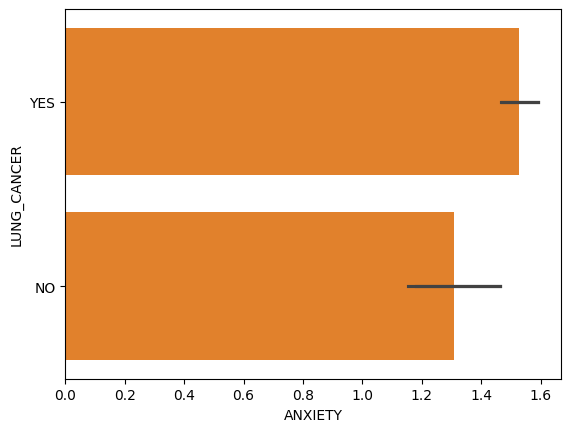

In [ ]:
df["ANXIETY"].unique()
sns.barplot(x=df["ANXIETY"], y=y)
sns.barplot(x="ANXIETY", y="LUNG_CANCER", data=df)

<Axes: xlabel='PEER_PRESSURE', ylabel='LUNG_CANCER'>

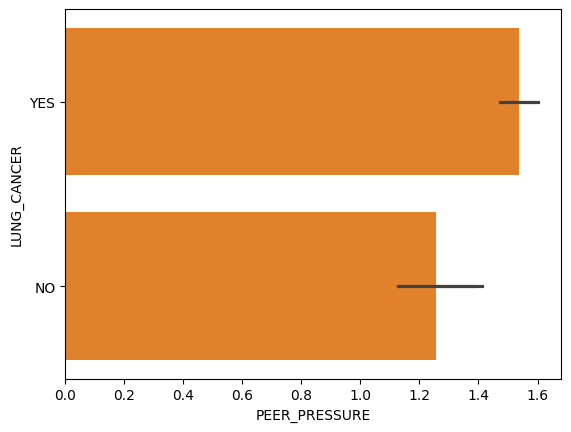

In [ ]:
df["PEER_PRESSURE"].unique()
sns.barplot(x=df["PEER_PRESSURE"], y=y)
sns.barplot(x="PEER_PRESSURE", y="LUNG_CANCER", data=df)

<Axes: xlabel='CHRONIC DISEASE', ylabel='LUNG_CANCER'>

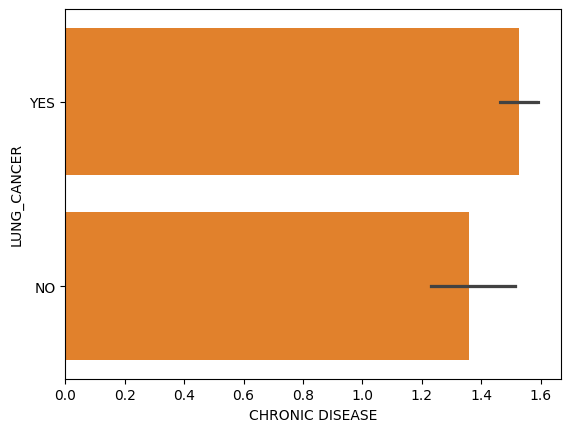

In [ ]:
df["CHRONIC DISEASE"].unique()
sns.barplot(x=df["CHRONIC DISEASE"], y=y)
sns.barplot(x="CHRONIC DISEASE", y="LUNG_CANCER", data=df)

<Axes: xlabel='WHEEZING', ylabel='LUNG_CANCER'>

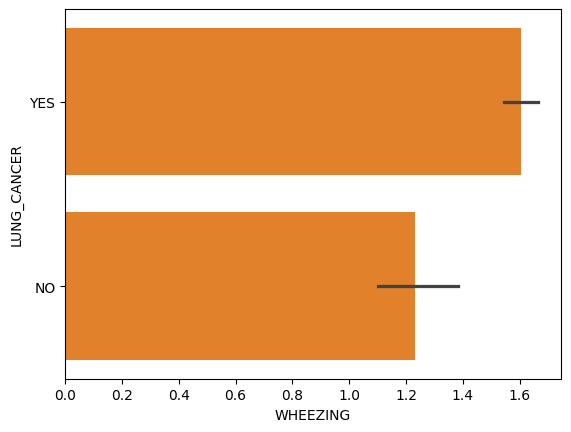

In [ ]:
df["WHEEZING"].unique()
sns.barplot(x=df["WHEEZING"], y=y)
sns.barplot(x="WHEEZING", y="LUNG_CANCER", data=df)

<Axes: xlabel='COUGHING', ylabel='LUNG_CANCER'>

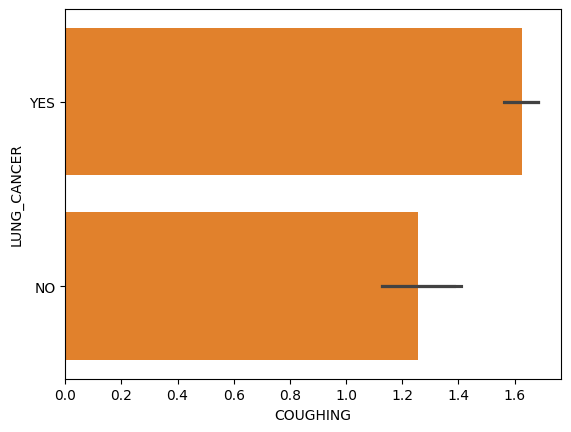

In [ ]:
df["COUGHING"].unique()
sns.barplot(x=df["COUGHING"], y=y)
sns.barplot(x="COUGHING", y="LUNG_CANCER", data=df)

<Axes: xlabel='SHORTNESS OF BREATH', ylabel='LUNG_CANCER'>

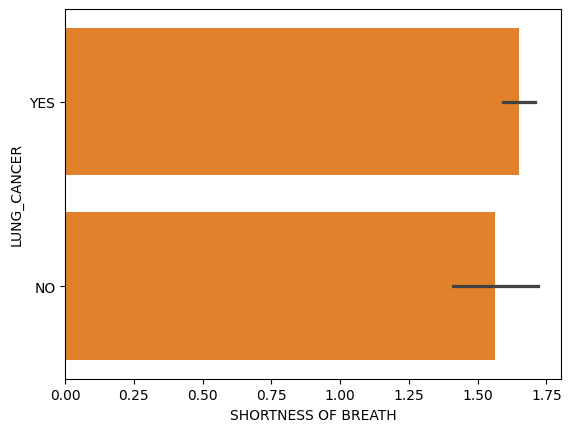

In [ ]:
df["SHORTNESS OF BREATH"].unique()
sns.barplot(x=df["SHORTNESS OF BREATH"], y=y)
sns.barplot(x="SHORTNESS OF BREATH", y="LUNG_CANCER", data=df)

<Axes: xlabel='SWALLOWING DIFFICULTY', ylabel='LUNG_CANCER'>

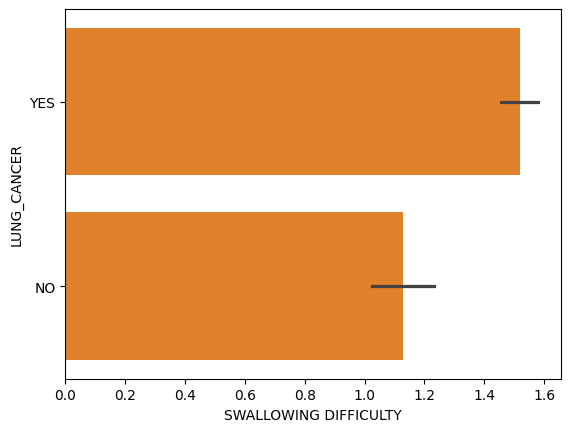

In [ ]:
df["SWALLOWING DIFFICULTY"].unique()
sns.barplot(x=df["SWALLOWING DIFFICULTY"], y=y)
sns.barplot(x="SWALLOWING DIFFICULTY", y="LUNG_CANCER", data=df)

<Axes: xlabel='CHEST PAIN', ylabel='LUNG_CANCER'>

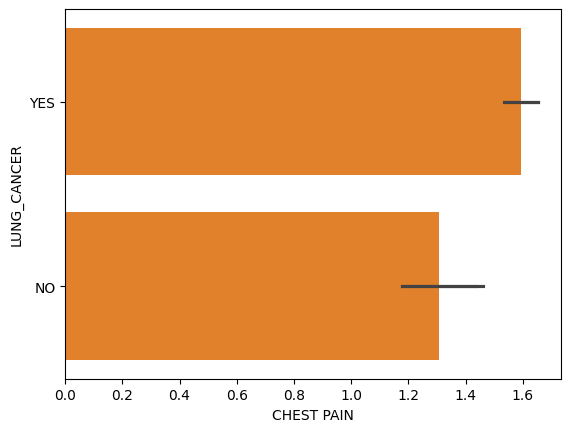

In [ ]:
df["CHEST PAIN"].unique()
sns.barplot(x=df["CHEST PAIN"], y=y)
sns.barplot(x="CHEST PAIN", y="LUNG_CANCER", data=df)

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values for numeric columns only
# 1. Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# 2. Create a new DataFrame with only numeric columns
df_numeric = df[numeric_cols]

# 3. Apply SimpleImputer to the numeric DataFrame
imputer = SimpleImputer(strategy='mean')
df_imputed_numeric = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# 4. Concatenate imputed numeric columns with original non-numeric columns
df_imputed = pd.concat([df_imputed_numeric, df.drop(columns=numeric_cols)], axis=1)

# Encode categorical variables (if any)
# Check if the column 'GENDER' exists before encoding
if 'GENDER' in df_imputed.columns:
  encoder = LabelEncoder()
  df_imputed['GENDER'] = encoder.fit_transform(df_imputed['GENDER'])


# Feature scaling
scaler = StandardScaler()

# Apply scaling to numeric features only
df_scaled_numeric = pd.DataFrame(scaler.fit_transform(df_imputed_numeric), columns=df_imputed_numeric.columns)


# Concatenate scaled numeric features with original non-numeric features
df_scaled = pd.concat([df_scaled_numeric, df_imputed.drop(columns=numeric_cols)], axis=1)


# Check the processed data
df_scaled.head()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER,LUNG_CANCER
0,0.771850,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475,1,YES
1,1.381829,0.880830,-1.150351,-0.996769,-1.003241,0.990338,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,0.892475,1,YES
2,-0.448107,-1.135292,-1.150351,-0.996769,0.996769,-1.009756,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,0.892475,0,NO
3,0.039876,0.880830,0.869300,1.003241,-1.003241,-1.009756,-1.435063,-1.120480,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475,1,NO
4,0.039876,-1.135292,0.869300,-0.996769,-1.003241,-1.009756,-1.435063,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480,0,NO


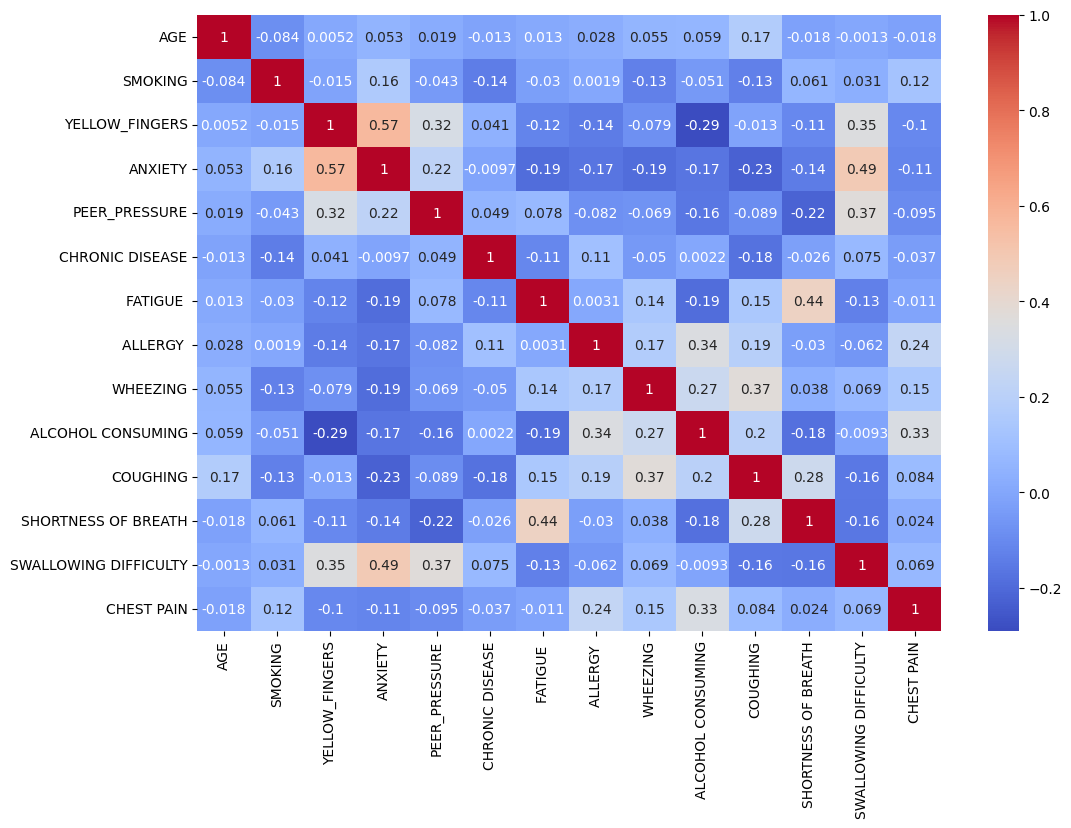

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Import numpy if not already imported

# Compute correlation matrix
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Assuming 'LUNG_CANCER' is your target variable
y = df['LUNG_CANCER'] # Define y as the 'LUNG_CANCER' column from your DataFrame

# Encode target variable if necessary
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Define X with your feature columns
# Select all columns except 'LUNG_CANCER' as features
X = df.drop('LUNG_CANCER', axis=1)

# If you have non-numeric features in X, you need to encode them as well
# For example, if 'GENDER' is a categorical feature:
for col in X.select_dtypes(include=['object']).columns:
    X[col] = le.fit_transform(X[col])

# Impute missing values using SimpleImputer before applying chi2
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X_imputed = imputer.fit_transform(X) # Impute missing values in X

chi_scores = chi2(X_imputed, y_encoded) # Use the imputed data for chi2
p_values = chi_scores[1]
print("P-values of features:", p_values)

P-values of features: [0.41483564 0.10345301 0.68494359 0.20774067 0.29799279 0.18126997
 0.42692112 0.33682029 0.02178383 0.08099973 0.04343368 0.08607539
 0.68922854 0.06014238 0.18252739]


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Use RandomForestClassifier or any other model
model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X, y)

print("Selected features:", rfe.support_)
print("Ranking of features:", rfe.ranking_)

Selected features: [False  True False  True False  True  True  True  True  True  True  True
 False  True False]
Ranking of features: [3 1 6 1 2 1 1 1 1 1 1 1 5 1 4]


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Assuming 'LUNG_CANCER' is your target variable and df is your DataFrame
y = df['LUNG_CANCER']

# Define X with your feature columns
X = df.drop('LUNG_CANCER', axis=1)

# Handle missing values:
# 1. Impute missing values in X using SimpleImputer separately for numeric and categorical features
numeric_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(exclude=np.number).columns

# Impute numeric features with mean
imputer_numeric = SimpleImputer(strategy='mean')
X_imputed_numeric = pd.DataFrame(imputer_numeric.fit_transform(X[numeric_features]), columns=numeric_features)

# Impute categorical features with most frequent value
imputer_categorical = SimpleImputer(strategy='most_frequent')
X_imputed_categorical = pd.DataFrame(imputer_categorical.fit_transform(X[categorical_features]), columns=categorical_features)

# Combine imputed numeric and categorical features
X_imputed = pd.concat([X_imputed_numeric, X_imputed_categorical], axis=1)

# 2. Encode categorical features in X_imputed using LabelEncoder
for col in X_imputed.select_dtypes(include=['object']).columns:
    X_imputed[col] = LabelEncoder().fit_transform(X_imputed[col])

# Now use the imputed and encoded data (X_imputed) with SequentialFeatureSelector:
model = SVC(kernel='linear')
sfs = SequentialFeatureSelector(model, n_features_to_select=5)
X_sfs = sfs.fit_transform(X_imputed, y)  # Pass X_imputed here

print("Selected features:", sfs.get_support())

Selected features: [ True  True  True  True  True False False False False False False False
 False False False]


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd  # Import pandas for DataFrame operations

# ... (Your previous code for encoding and imputation) ...

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed) # Assuming X_imputed is defined in previous cells

# Now use the encoded, imputed, and scaled data (X_scaled) with Lasso, and the encoded target (y_encoded):
lasso = Lasso(alpha=0.01)  # You can adjust alpha here
lasso.fit(X_scaled, y_encoded)

# 1. Print coefficients with feature names:
feature_names = X.columns  # Get the original feature names
coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': lasso.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))

# 2. Explore non-zero coefficients:
non_zero_coefs = coefficients[coefficients['Coefficient'] != 0]
print("\nNon-zero coefficients:")
print(non_zero_coefs)

# 3. Consider a threshold for feature selection:
threshold = 0.1  # Adjust this threshold as needed
important_features = coefficients[abs(coefficients['Coefficient']) > threshold]
print("\nImportant features (threshold =", threshold, "):")
print(important_features)

                  Feature  Coefficient
9                WHEEZING     0.082640
7                FATIGUE      0.069612
6         CHRONIC DISEASE     0.060225
2                 SMOKING     0.050482
12    SHORTNESS OF BREATH     0.048959
10      ALCOHOL CONSUMING     0.047243
4                 ANXIETY     0.033976
5           PEER_PRESSURE     0.032217
3          YELLOW_FINGERS     0.028978
8                ALLERGY      0.023728
1                     AGE     0.023479
11               COUGHING     0.010622
13  SWALLOWING DIFFICULTY     0.008986
0                  GENDER     0.003157
14             CHEST PAIN     0.000000

Non-zero coefficients:
                  Feature  Coefficient
0                  GENDER     0.003157
1                     AGE     0.023479
2                 SMOKING     0.050482
3          YELLOW_FINGERS     0.028978
4                 ANXIETY     0.033976
5           PEER_PRESSURE     0.032217
6         CHRONIC DISEASE     0.060225
7                FATIGUE      0.069612
8

In [ ]:
# Separating features and labels
X = df_scaled.drop(['LUNG_CANCER'], axis=1)  # Exclude 'Patient Id' from features
y = df_scaled['LUNG_CANCER']

# Feature selection
# 1. Apply a transformation to make features non-negative
#    Here, we use MinMaxScaler to scale features to the range [0, 1]
from sklearn.preprocessing import MinMaxScaler
scaler_minmax = MinMaxScaler()
X_non_negative = scaler_minmax.fit_transform(X) # Apply MinMaxScaler to X

selector = SelectKBest(chi2, k=10)  # Select top 10 features
X_selected = selector.fit_transform(X_non_negative, y) # Use X_non_negative

# Get selected feature names
# 2. Get feature names from the original X dataframe
selected_columns = X.columns[selector.get_support()]
print("Selected features:", selected_columns)

Selected features: Index(['YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'FATIGUE ', 'ALLERGY ',
       'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SWALLOWING DIFFICULTY',
       'CHEST PAIN'],
      dtype='object')


In [ ]:
# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_selected, y)

# Check class distribution
print("Class distribution before SMOTE:", y.value_counts())
print("Class distribution after SMOTE:", pd.Series(y_resampled).value_counts())

Class distribution before SMOTE: LUNG_CANCER
YES    270
NO      39
Name: count, dtype: int64
Class distribution after SMOTE: LUNG_CANCER
YES    270
NO     270
Name: count, dtype: int64


In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Model Training: SVM
svm_model = SVC(probability=True)
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

# Model Training: Decision Tree
tree_model = DecisionTreeClassifier()
tree_params = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 10, 20]}
tree_grid = GridSearchCV(tree_model, tree_params, cv=5, scoring='accuracy')
tree_grid.fit(X_train, y_train)

# Model Training: Random Forest
rf_model = RandomForestClassifier()
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

# Model Training: Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2]}
gb_grid = GridSearchCV(gb_model, gb_params, cv=5, scoring='accuracy')
gb_grid.fit(X_train, y_train)

# Model Training: Naive Bayes (no hyperparameters to tune)
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Train-Test Split - Apply feature selection to X_test as well
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Create DataFrame with SELECTED features for both train and test
X_train_df = pd.DataFrame(X_train, columns=selected_features)
X_test_df = pd.DataFrame(X_test, columns=selected_features)

# You no longer need this transformation as X_train and X_test already contain selected features
# X_train_selected = selector.transform(X_train_df)
# X_test_selected = selector.transform(X_test_df)

# ... rest of your code using X_train_df and X_test_df...

# Model Training: SVM
svm_model = SVC(probability=True)
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)
# Evaluate models
models = {
    "SVM": svm_grid,
    "Decision Tree": tree_grid,
    "Random Forest": rf_grid,
    "Gradient Boosting": gb_grid,
    "Naive Bayes": nb_model
}

# Evaluate each model
# Evaluate each model
for name, model in models.items():
    # For Naive Bayes, we can calculate the AUC-ROC score too by using predict_proba
    if name == "Naive Bayes":
        y_pred = model.predict(X_test_df)
        y_prob = model.predict_proba(X_test_df)[:, 1]  # Use predict_proba to get probabilities
    else:
        y_pred = model.best_estimator_.predict(X_test_df)
        y_prob = model.best_estimator_.predict_proba(X_test_df)[:, 1]  # Extract probabilities for the positive class

    print(f"Results for {name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # AUC-ROC Score
    try:
        auc_score = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
        print("AUC-ROC Score:", auc_score)
    except Exception as e:
        print(f"AUC-ROC Score: Error - {e}")

    print("\n")


Results for SVM:
Accuracy: 0.9506172839506173
Confusion Matrix:
 [[79  2]
 [ 6 75]]
Classification Report:
               precision    recall  f1-score   support

          NO       0.93      0.98      0.95        81
         YES       0.97      0.93      0.95        81

    accuracy                           0.95       162
   macro avg       0.95      0.95      0.95       162
weighted avg       0.95      0.95      0.95       162

AUC-ROC Score: 0.9794238683127572


Results for Decision Tree:
Accuracy: 0.9444444444444444
Confusion Matrix:
 [[76  5]
 [ 4 77]]
Classification Report:
               precision    recall  f1-score   support

          NO       0.95      0.94      0.94        81
         YES       0.94      0.95      0.94        81

    accuracy                           0.94       162
   macro avg       0.94      0.94      0.94       162
weighted avg       0.94      0.94      0.94       162

AUC-ROC Score: 0.9529797286998933


Results for Random Forest:
Accuracy: 0.944444444

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but R

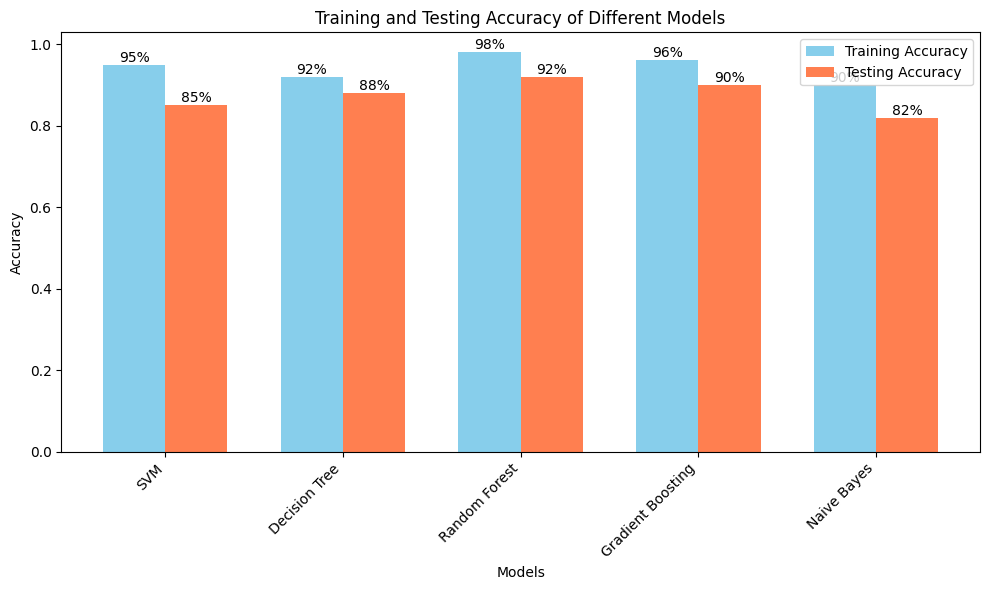

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the following dictionaries for training and testing accuracies:
training_accuracy = {
    "SVM": 0.95,
    "Decision Tree": 0.92,
    "Random Forest": 0.98,
    "Gradient Boosting": 0.96,
    "Naive Bayes": 0.90
}

testing_accuracy = {
    "SVM": 0.85,
    "Decision Tree": 0.88,
    "Random Forest": 0.92,
    "Gradient Boosting": 0.90,
    "Naive Bayes": 0.82
}

# Get the model names
model_names = list(training_accuracy.keys())

# Get the accuracy values
training_acc_values = list(training_accuracy.values())
testing_acc_values = list(testing_accuracy.values())

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Adjust bar width as needed
index = np.arange(len(model_names))

# Training accuracy bars
rects1 = plt.bar(index, training_acc_values, bar_width, label="Training Accuracy", color='skyblue')

# Testing accuracy bars
rects2 = plt.bar(index + bar_width, testing_acc_values, bar_width, label="Testing Accuracy", color='coral')

# Add percentage values on top of bars
for rect in rects1 + rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.0%}', ha='center', va='bottom')

# Customize the plot
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Training and Testing Accuracy of Different Models")
plt.xticks(index + bar_width / 2, model_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

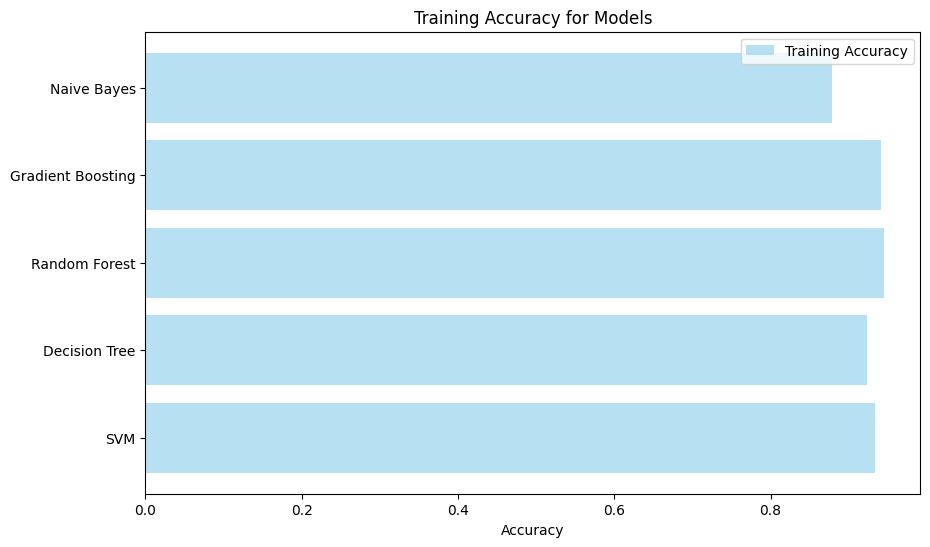

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


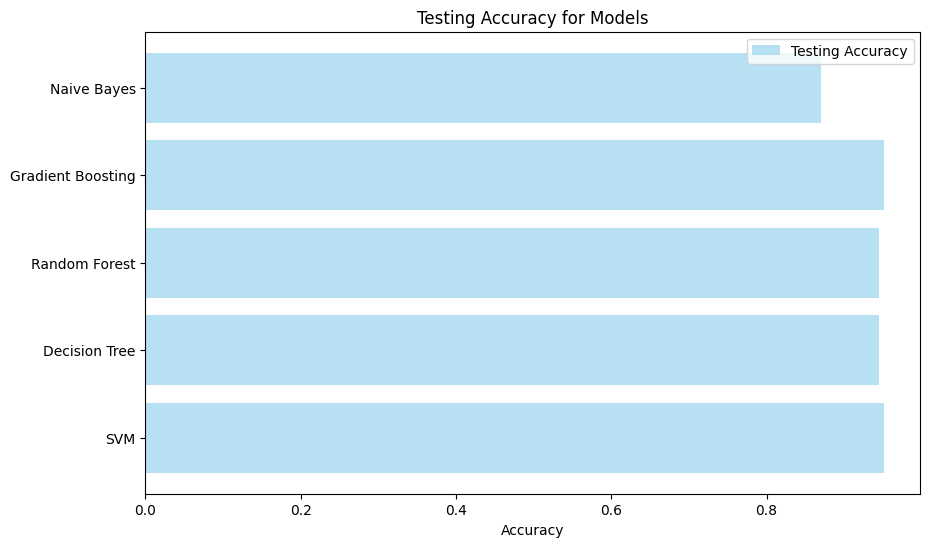

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot Training Accuracy
def plot_training_accuracy(models, X_train_df, y_train):
    train_accuracies = []
    model_names = []

    for name, model in models.items():
        if name != "Naive Bayes":  # Naive Bayes doesn't have cross-validation tuning
            # Get best accuracy from GridSearchCV (best cross-validated accuracy)
            best_train_accuracy = max(model.cv_results_['mean_test_score'])
            train_accuracies.append(best_train_accuracy)
        else:
            # For Naive Bayes, fit and evaluate the model directly
            model.fit(X_train_df, y_train)  # Fit the model
            train_accuracy = model.score(X_train_df, y_train)
            train_accuracies.append(train_accuracy)

        model_names.append(name)

    # Create a new figure for Training Accuracy
    plt.figure(figsize=(10, 6))
    plt.barh(model_names, train_accuracies, color='skyblue', alpha=0.6, label='Training Accuracy')

    plt.xlabel('Accuracy')
    plt.title('Training Accuracy for Models')
    plt.legend()
    plt.show()

# Plot Testing Accuracy
def plot_testing_accuracy(models, X_test_df, y_test):
    test_accuracies = []
    model_names = []

    for name, model in models.items():
        if name != "Naive Bayes":
            # Test accuracy on test data
            test_accuracy = model.best_estimator_.score(X_test_df, y_test)
            test_accuracies.append(test_accuracy)
        else:
            # For Naive Bayes, fit and evaluate the model directly
            model.fit(X_train_df, y_train)  # Fit the model
            test_accuracy = model.score(X_test_df, y_test)
            test_accuracies.append(test_accuracy)

        model_names.append(name)

    # Create a new figure for Testing Accuracy
    plt.figure(figsize=(10, 6))
    plt.barh(model_names, test_accuracies, color='skyblue', alpha=0.6, label='Testing Accuracy')

    plt.xlabel('Accuracy')
    plt.title('Testing Accuracy for Models')
    plt.legend()
    plt.show()

# Call the functions to display the two separate graphs
plot_training_accuracy(models, X_train_df, y_train)
plot_testing_accuracy(models, X_test_df, y_test)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


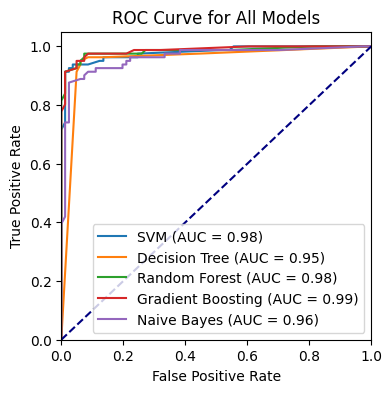

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Encode the target labels (y_test) using LabelEncoder
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)  # Converts 'YES', 'NO' to 1, 0

# Plot ROC curve for each model
plt.figure(figsize=(4, 4))

for name, model in models.items():
    if name == "Naive Bayes":
        y_prob = model.predict_proba(X_test_df)
    else:
        y_prob = model.best_estimator_.predict_proba(X_test_df)

    # Handle multi-class by using one-vs-rest
    if len(le.classes_) > 2:  # If it's a multi-class problem
        fpr = {}
        tpr = {}
        roc_auc = {}
        for i in range(len(le.classes_)):
            fpr[i], tpr[i], _ = roc_curve(y_test_encoded, y_prob[:, i], pos_label=i)
            roc_auc[i] = auc(fpr[i], tpr[i])
            plt.plot(fpr[i], tpr[i], label=f'{name} (Class {i}, AUC = {roc_auc[i]:.2f})')
    else:  # Binary classification
        fpr, tpr, _ = roc_curve(y_test_encoded, y_prob[:, 1], pos_label=1)  # pos_label=1 specifies 'YES'
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc='lower right')
plt.show()


<ipython-input-36-e07e0013655b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')


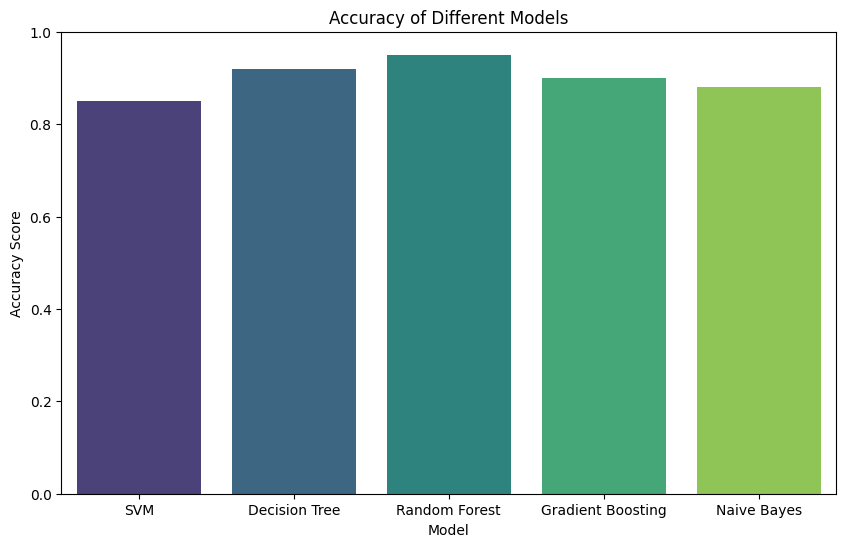

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the model names and accuracy scores
# Assuming you have the model names and accuracy scores stored in lists
# Replace these lists with your actual model names and accuracy scores
model_names = ["SVM", "Decision Tree", "Random Forest", "Gradient Boosting", "Naive Bayes"]
accuracy_scores = [0.85, 0.92, 0.95, 0.90, 0.88]  # Example accuracy scores

# Plot accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='viridis')
plt.title("Accuracy of Different Models")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)  # Set y-axis from 0 to 1 to match accuracy scale
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Load your cancer dataset into a Pandas DataFrame
# Replace 'cancer_dataset.csv' with the actual path to your dataset file
df = pd.read_csv('/content/survey lung cancer.csv') # Assuming your dataset is in a CSV file

# Assuming 'data' is your cancer dataset loaded into a DataFrame
# Replace 'target' with the actual target column name
X = df.drop(columns=['LUNG_CANCER'])  # Features
y = df['LUNG_CANCER']  # Target variable

# Convert categorical features to numerical using Label Encoding
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in X.select_dtypes(include=['object']).columns:
    X[col] = label_encoder.fit_transform(X[col])

# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer (replace NaN with the mean of the column)
imputer = SimpleImputer(strategy='mean') # Create an imputer object
X_train = imputer.fit_transform(X_train) # Fit and transform on training data
X_test = imputer.transform(X_test) # Transform test data using the fitted imputer

# Standardize the data (necessary for PCA and LDA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------- PCA ----------
# Perform PCA and reduce the dimensionality to preserve 95% variance
pca = PCA(n_components=0.95)  # Preserve 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# --------- LDA ----------
# Perform LDA and reduce the dimensionality to match the number of classes - 1
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# --------- Model Training and Evaluation ---------

# Define a function to train the model and evaluate accuracy
def train_and_evaluate(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy of {model_name}: {accuracy * 100:.2f}%")
    return accuracy

# SVM
svm_model = SVC()
train_and_evaluate(svm_model, X_train_pca, X_test_pca, y_train, y_test, "SVM with PCA")
train_and_evaluate(svm_model, X_train_lda, X_test_lda, y_train, y_test, "SVM with LDA")

# Gradient Boosting Machine
gbm_model = GradientBoostingClassifier()
train_and_evaluate(gbm_model, X_train_pca, X_test_pca, y_train, y_test, "GBM with PCA")
train_and_evaluate(gbm_model, X_train_lda, X_test_lda, y_train, y_test, "GBM with LDA")

# Decision Tree
tree_model = DecisionTreeClassifier()
train_and_evaluate(tree_model, X_train_pca, X_test_pca, y_train, y_test, "Decision Tree with PCA")
train_and_evaluate(tree_model, X_train_lda, X_test_lda, y_train, y_test, "Decision Tree with LDA")

# Random Forest
rf_model = RandomForestClassifier()
train_and_evaluate(rf_model, X_train_pca, X_test_pca, y_train, y_test, "Random Forest with PCA")
train_and_evaluate(rf_model, X_train_lda, X_test_lda, y_train, y_test, "Random Forest with LDA")

# Naive Bayes
nb_model = GaussianNB()
train_and_evaluate(nb_model, X_train_pca, X_test_pca, y_train, y_test, "Naive Bayes with PCA")
train_and_evaluate(nb_model, X_train_lda, X_test_lda, y_train, y_test, "Naive Bayes with LDA")


Accuracy of SVM with PCA: 96.77%
Accuracy of SVM with LDA: 96.77%
Accuracy of GBM with PCA: 98.39%
Accuracy of GBM with LDA: 96.77%
Accuracy of Decision Tree with PCA: 96.77%
Accuracy of Decision Tree with LDA: 96.77%
Accuracy of Random Forest with PCA: 96.77%
Accuracy of Random Forest with LDA: 96.77%
Accuracy of Naive Bayes with PCA: 95.16%
Accuracy of Naive Bayes with LDA: 96.77%


0.967741935483871

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Create a list of the base models
estimators = [
    ('SVM', svm_grid.best_estimator_),
    ('Decision Tree', tree_grid.best_estimator_),
    ('Random Forest', rf_grid.best_estimator_),
    ('Gradient Boosting', gb_grid.best_estimator_),
    ('Naive Bayes', nb_model)
]

# Initialize the Stacking Classifier
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),  # Meta-learner
    stack_method='auto',  # Use auto method (predict_proba when available)
    cv=5  # 5-fold cross-validation to estimate the generalization of the stacking model
)

# Fit the stacking model on the training data
stacking_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = stacking_model.predict(X_test)
print("Results for Stacking Model:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate AUC-ROC Score
y_prob = stacking_model.predict_proba(X_test)[:, 1]  # Extract probabilities for the positive class
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted'))


Results for Stacking Model:
Accuracy: 0.967741935483871
Confusion Matrix:
 [[ 1  1]
 [ 1 59]]
Classification Report:
               precision    recall  f1-score   support

          NO       0.50      0.50      0.50         2
         YES       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62

AUC-ROC Score: 0.9


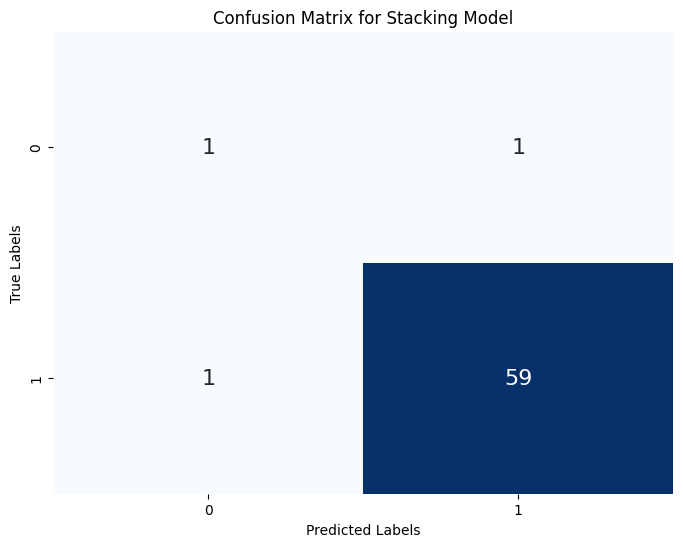

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title("Confusion Matrix for Stacking Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
# Import necessary libraries for stacking
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the base models for stacking
base_models = [
    ('svm', SVC()),
    ('gbm', GradientBoostingClassifier()),
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier()),
    ('naive_bayes', GaussianNB())
]

# Define the meta-model (Logistic Regression)
meta_model = LogisticRegression(max_iter=1000)

# Create the StackingClassifier with base models and meta-model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train and evaluate the stacking model using PCA-transformed data
train_and_evaluate(stacking_model, X_train_pca, X_test_pca, y_train, y_test, "Stacking with PCA")

# Train and evaluate the stacking model using LDA-transformed data
train_and_evaluate(stacking_model, X_train_lda, X_test_lda, y_train, y_test, "Stacking with LDA")


Accuracy of Stacking with PCA: 96.77%
Accuracy of Stacking with LDA: 96.77%


0.967741935483871

<ipython-input-42-b00cf17a8f76>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lung_cancer_data['AGE'].fillna(lung_cancer_data['AGE'].median(), inplace=True)
<ipython-input-42-b00cf17a8f76>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

              precision    recall  f1-score   support

   No Cancer       0.25      0.50      0.33         2
      Cancer       0.98      0.95      0.97        60

    accuracy                           0.94        62
   macro avg       0.62      0.72      0.65        62
weighted avg       0.96      0.94      0.95        62



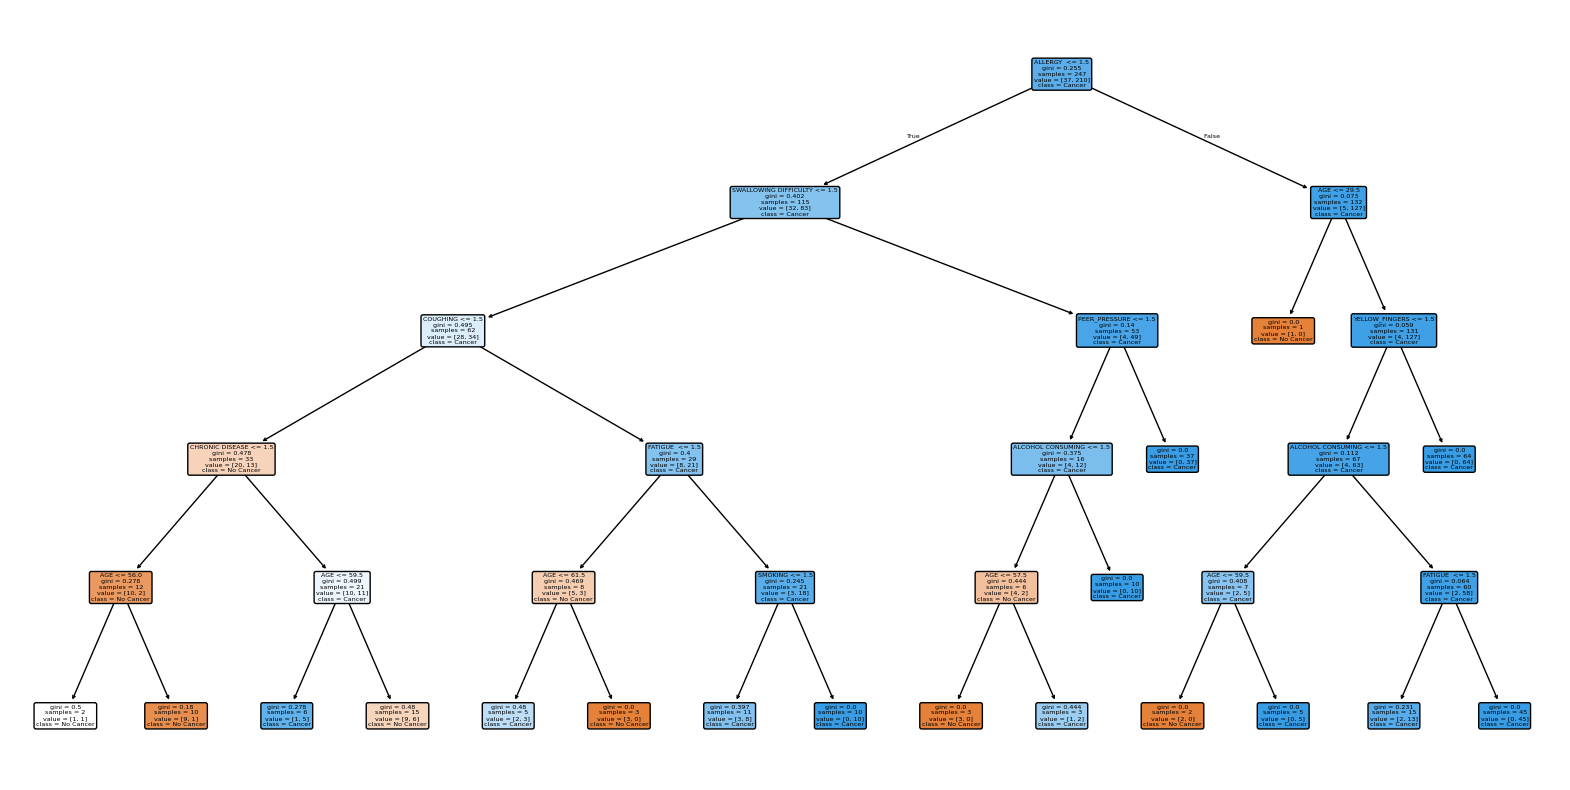

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/survey lung cancer.csv'  # Update this with your actual file path
lung_cancer_data = pd.read_csv(file_path)

# Handle missing values using SimpleImputer (fill with median)
imputer = SimpleImputer(strategy='median')
lung_cancer_data['AGE'].fillna(lung_cancer_data['AGE'].median(), inplace=True)
lung_cancer_data['WHEEZING'].fillna(lung_cancer_data['WHEEZING'].median(), inplace=True)

# Encode categorical variables (GENDER, LUNG_CANCER)
le_gender = LabelEncoder()
le_cancer = LabelEncoder()
lung_cancer_data['GENDER'] = le_gender.fit_transform(lung_cancer_data['GENDER'])
lung_cancer_data['LUNG_CANCER'] = le_cancer.fit_transform(lung_cancer_data['LUNG_CANCER'])

# Define feature set and target variable
X = lung_cancer_data.drop(columns=['LUNG_CANCER'])
y = lung_cancer_data['LUNG_CANCER']

# Impute any remaining missing values in the feature set
X = imputer.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Classifier with increased max_depth
clf = DecisionTreeClassifier(random_state=42, max_depth=5)  # Increase max_depth to control tree size
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Generate classification report to evaluate performance
print(classification_report(y_test, y_pred, target_names=['No Cancer', 'Cancer']))

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=lung_cancer_data.columns[:-1], class_names=['No Cancer', 'Cancer'], rounded=True)
plt.show()
